In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import normalize
import matplotlib.pyplot as plt
import cv2
import matplotlib.pyplot as plt
from glob import glob
import os
import random
import numpy as np

In [12]:
input_directory = './Dataset/images/'
output_directory = './test-removing-artifacts-3/'
model_20221030 = load_model('./Trained_models/20221030_atherosclerosis_model.h5')
model_20230326 = load_model('./Trained_models/20230326_atherosceloris_model.h5')
model_20230329 = load_model('./Trained_models/20230329_atherosceloris_model.h5')
model_20230331 = load_model('./Trained_models/20230331_atherosceloris_model.h5')

In [4]:
def segment_image(model, img_path):
    img = cv2.imread(img_path, 0)
    img = np.array(img)

    img = np.expand_dims(img, axis=2)
    img = normalize(img, axis=1)

    img_norm = img[:,:,0][:,:,None]
    img_input=np.expand_dims(img_norm, 0)
    prediction=(model.predict(img_input))
    predicted_img=np.argmax(prediction, axis=3)[0,:,:]
    
    return predicted_img

In [5]:
def delete_artifacts(input_dir, output_dir, model):
    if os.path.exists(input_dir) == False:
        print('Input directory does not exist !')
        return
    if os.path.exists(output_dir) == False:
        print('Creating output directory ...')
        os.mkdir(output_dir)
    
    for directory_path in glob(input_dir):
        for img_path in glob(os.path.join(directory_path, "*.png")):
            img = cv2.imread(img_path, 0)
            np_img = np.array(img)
            np_img = np.expand_dims(np_img, axis=2)
            np_img = normalize(np_img, axis=1)

            img_norm = np_img[:,:,0][:,:,None]
            img_input=np.expand_dims(img_norm, 0)
            prediction = (model.predict(img_input))
            predicted_img = np.argmax(prediction, axis=3)[0,:,:]
            
            mask = np.logical_and(predicted_img > 2, predicted_img < 4)
            img[mask] = 0
            cv2.imwrite(os.path.join(output_dir, img_path.replace(directory_path, '')), img)

In [ ]:
delete_artifacts(input_directory, output_directory, model_20221030)

Creating output directory ...


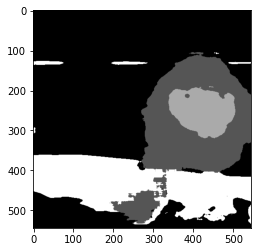

In [10]:
plt.imshow(segment_image(model_20230331, './Dataset/images/1497.png') ,cmap='gray')